In [2]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [3]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [4]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])
df.head()

,A,B,C
2016-07-01 00:00:00,0.620777,0.452030,-1.401855
2016-07-01 00:00:01,0.537051,-0.507224,-1.255583
2016-07-01 00:00:02,0.344395,-0.630141,0.632088
2016-07-01 00:00:03,-1.202505,-1.116193,1.068453
2016-07-01 00:00:04,0.529499,-0.892091,0.270614


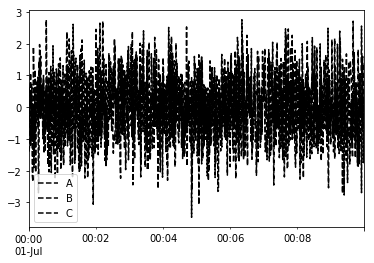

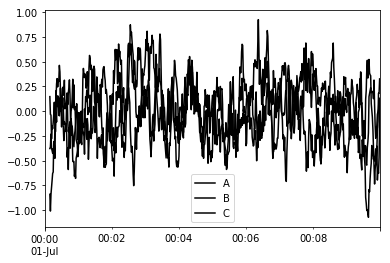

In [5]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [6]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

/Users/Rachel/.pyenv/versions/py36_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  


,A,B,C
2016-07-01 00:00:01,0.576123,-0.059572,-1.323843
2016-07-01 00:00:02,0.488368,-0.275646,-0.583135
2016-07-01 00:00:03,-0.022385,-0.529546,-0.084249
2016-07-01 00:00:04,0.119243,-0.622584,0.006818
2016-07-01 00:00:05,0.118004,-0.317812,-0.074608
2016-07-01 00:00:06,-0.064144,-0.691913,-0.037888
2016-07-01 00:00:07,-0.336381,-1.007134,-0.220369
2016-07-01 00:00:08,0.063478,-0.832914,-0.259057
2016-07-01 00:00:09,0.202596,-1.014588,-0.454150


In [7]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [8]:
df.head()

,A,B,C,D
2016-06-06,1.584423,0.812915,0.990336,0.926351
2016-06-07,-0.504100,-1.464162,0.116260,0.648918
2016-06-08,0.706489,0.382802,0.777725,-0.923205
2016-06-09,0.316255,-0.713016,-1.268961,-0.836170
2016-06-10,-0.779698,0.348474,1.690377,0.506713


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10dde9a20>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10e66e358>], dtype=object)

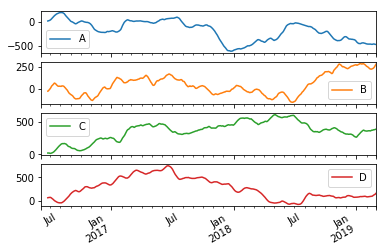

In [9]:
df = df.cumsum()
df.rolling(window = 20).sum().plot(subplots=True)
# note: window = row count (if daily, 20 = 20 days)

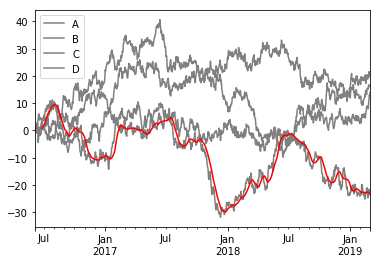

In [10]:
r = df.rolling(window=20)
df.plot(color = 'gray')
r.mean()['A'].plot(color = 'red')

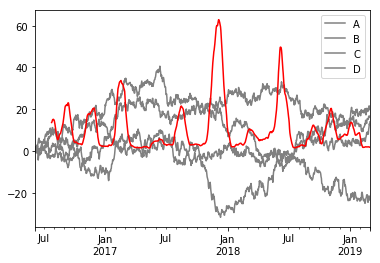

In [11]:
r = df.rolling(window=50)
df.plot(color = 'gray')
r.var()['A'].plot(color = 'red')

In [12]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,0.852683,0.831347,0.632853,1.152920


In [13]:
# range
df.rolling(window = 10).apply(lambda x: x[0] - x[-1])

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,2.521347,5.213879,0.399678,-3.315935


In [14]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,1.332372,0.080834,1.048466,1.250810
2016-06-08,1.483852,-0.035592,1.327084,1.051228
2016-06-09,1.638656,-0.272059,1.149153,0.742394
2016-06-10,1.575598,-0.344245,1.380470,0.658437


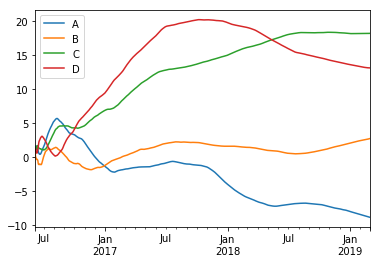

In [15]:
df.expanding(min_periods = 1).mean().plot()

In [16]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# An expanding window will be more stable later on (when window is larger) 

# When might one vs. the other be appropriate?
# Expanding window is more useful when you care both about new data
# but also older data

In [17]:
# EWMA
# Why use EWMA?
# Tells you more about what's not in the center of the window

In [18]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

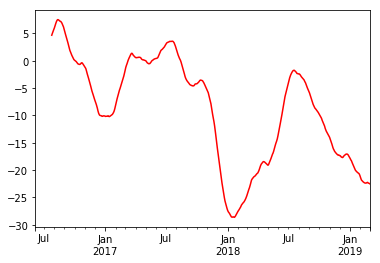

In [19]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting
r = df.rolling(window=50)
r.mean()['A'].plot(color = 'red')

/Users/Rachel/.pyenv/versions/py36_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


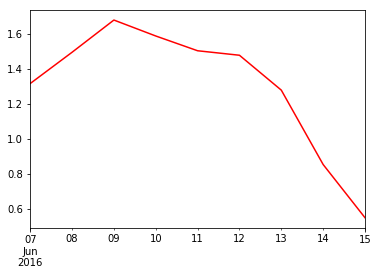

In [20]:
pd.ewma(df['A'], span = 15, min_periods = 2)[1:10].plot(color='red')